In [16]:
import warnings;
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import torch
from packages.models.prophet_model import prophet_run
from packages.visual_files.visualization import visualize
from packages.utils.utils import load_files, load_files_prophet, preprocess_data
from packages.train.start_model import initialization

pd.options.display.max_columns = 100


In [2]:
%load_ext autoreload
%autoreload 2

## Import Data

In [4]:
adj_matrix, transactions_speed_days = load_files('./data/distance_adj_matrix.csv'), load_files('./data/time_series_data.csv')
time_series_long_sorted = load_files_prophet('./data/prophet_time_series_data.csv')

print(f'Transaction Speed data shape: {transactions_speed_days.shape}')
print(f'Adjacency matrix shape: {adj_matrix.shape}')

Transaction Speed data shape: (365, 85)
Adjacency matrix shape: (85, 85)


## Settings

In [6]:
# Initial learning rate
learning_rate = 0.001

# Number of epochs to train
training_epoch = 10

# hidden units of gru
gru_units = 92

# time length of inputs
seq_len = 30                    #changed (was 7)

# time length of prediction
output_dim = pre_len = 30          #changed (was 7)

# rate of training set
train_rate = 0.92                  #changed (was 0.92)

# batch size
batch_size = 32

x_axe,batch_loss,batch_rmse,batch_pred = [], [], [], []
test_loss,test_rmse,test_mae,test_acc,test_r2,test_var,test_pred = [],[],[],[],[],[],[]

## Train-Test Split

In [8]:
# Train Test Split for GCN, GRU, T-GCN, A3T-GCN
adj, data = adj_matrix, transactions_speed_days

time_len = data.shape[0]
num_nodes = data.shape[1]

data1 =np.mat(data,dtype=np.float32)
max_value = np.max(data1)
data1  = data1/max_value

trainX, trainY, testX, testY = preprocess_data(data1, time_len, train_rate, seq_len, pre_len)

totalbatch = int(np.array(trainX).shape[0]/batch_size)
training_data_count = len(trainX)

# Train Test Split for Baseline
train_prophet = time_series_long_sorted.loc[time_series_long_sorted['ds'] < '2017-12-02']
valid_prophet = time_series_long_sorted.loc[(time_series_long_sorted['ds'] >= '2017-12-02')]

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

## Start Model

#### GCN, GRU, TGCN, A3T-GCN

In [10]:
model_name = 'GRU'

In [11]:
y_pred, test_rmse, test_wmape = initialization(model_name, trainX, trainY, testX, testY, adj, learning_rate, gru_units, seq_len, pre_len, training_epoch, totalbatch, batch_size, num_nodes, device)

Number of weights: 25944
Iter: 1 mae: 0.03344 rmse: 0.03999 mape: inf wmape_score: 0.6689
Iter: 2 mae: 0.02555 rmse: 0.03131 mape: inf wmape_score: 0.511
Iter: 3 mae: 0.02498 rmse: 0.03074 mape: inf wmape_score: 0.4997
Iter: 4 mae: 0.02445 rmse: 0.03014 mape: inf wmape_score: 0.489
Iter: 5 mae: 0.02272 rmse: 0.02857 mape: inf wmape_score: 0.4545
Iter: 6 mae: 0.02239 rmse: 0.02812 mape: inf wmape_score: 0.4478
Iter: 7 mae: 0.02231 rmse: 0.0279 mape: inf wmape_score: 0.4463
Iter: 8 mae: 0.02212 rmse: 0.02765 mape: inf wmape_score: 0.4425
Iter: 9 mae: 0.02223 rmse: 0.02771 mape: inf wmape_score: 0.4446
Iter: 10 mae: 0.02199 rmse: 0.02749 mape: inf wmape_score: 0.4399


#### Baseline: Prophet

In [12]:
p = prophet_run(train_prophet, valid_prophet)

atm: 0


01:23:56 - cmdstanpy - INFO - Chain [1] start processing
01:23:56 - cmdstanpy - INFO - Chain [1] done processing
01:23:56 - cmdstanpy - INFO - Chain [1] start processing
01:23:56 - cmdstanpy - INFO - Chain [1] done processing


atm: 108


01:23:57 - cmdstanpy - INFO - Chain [1] start processing
01:23:57 - cmdstanpy - INFO - Chain [1] done processing


atm: 105


01:23:57 - cmdstanpy - INFO - Chain [1] start processing
01:23:57 - cmdstanpy - INFO - Chain [1] done processing


atm: 7


01:23:57 - cmdstanpy - INFO - Chain [1] start processing


atm: 86


01:23:57 - cmdstanpy - INFO - Chain [1] done processing
01:23:57 - cmdstanpy - INFO - Chain [1] start processing


atm: 18


01:23:57 - cmdstanpy - INFO - Chain [1] done processing
01:23:58 - cmdstanpy - INFO - Chain [1] start processing
01:23:58 - cmdstanpy - INFO - Chain [1] done processing


atm: 19


01:23:58 - cmdstanpy - INFO - Chain [1] start processing


atm: 64


01:23:58 - cmdstanpy - INFO - Chain [1] done processing
01:23:58 - cmdstanpy - INFO - Chain [1] start processing


atm: 38


01:23:58 - cmdstanpy - INFO - Chain [1] done processing
01:23:58 - cmdstanpy - INFO - Chain [1] start processing


atm: 90


01:23:59 - cmdstanpy - INFO - Chain [1] done processing
01:23:59 - cmdstanpy - INFO - Chain [1] start processing
01:23:59 - cmdstanpy - INFO - Chain [1] done processing


atm: 83


01:23:59 - cmdstanpy - INFO - Chain [1] start processing


atm: 24


01:23:59 - cmdstanpy - INFO - Chain [1] done processing
01:23:59 - cmdstanpy - INFO - Chain [1] start processing


atm: 78


01:23:59 - cmdstanpy - INFO - Chain [1] done processing
01:24:00 - cmdstanpy - INFO - Chain [1] start processing


atm: 69


01:24:00 - cmdstanpy - INFO - Chain [1] done processing
01:24:00 - cmdstanpy - INFO - Chain [1] start processing
01:24:00 - cmdstanpy - INFO - Chain [1] done processing


atm: 33


01:24:00 - cmdstanpy - INFO - Chain [1] start processing


atm: 102


01:24:00 - cmdstanpy - INFO - Chain [1] done processing
01:24:00 - cmdstanpy - INFO - Chain [1] start processing


atm: 36


01:24:00 - cmdstanpy - INFO - Chain [1] done processing
01:24:01 - cmdstanpy - INFO - Chain [1] start processing
01:24:01 - cmdstanpy - INFO - Chain [1] done processing


atm: 35


01:24:01 - cmdstanpy - INFO - Chain [1] start processing


atm: 67


01:24:01 - cmdstanpy - INFO - Chain [1] done processing
01:24:01 - cmdstanpy - INFO - Chain [1] start processing
01:24:01 - cmdstanpy - INFO - Chain [1] done processing


atm: 109


01:24:01 - cmdstanpy - INFO - Chain [1] start processing


atm: 46


01:24:02 - cmdstanpy - INFO - Chain [1] done processing
01:24:02 - cmdstanpy - INFO - Chain [1] start processing


atm: 56


01:24:02 - cmdstanpy - INFO - Chain [1] done processing


atm: 3


01:24:02 - cmdstanpy - INFO - Chain [1] start processing
01:24:02 - cmdstanpy - INFO - Chain [1] done processing
01:24:02 - cmdstanpy - INFO - Chain [1] start processing


atm: 32


01:24:03 - cmdstanpy - INFO - Chain [1] done processing
01:24:03 - cmdstanpy - INFO - Chain [1] start processing


atm: 4


01:24:03 - cmdstanpy - INFO - Chain [1] done processing
01:24:03 - cmdstanpy - INFO - Chain [1] start processing


atm: 70


01:24:03 - cmdstanpy - INFO - Chain [1] done processing
01:24:03 - cmdstanpy - INFO - Chain [1] start processing


atm: 107


01:24:03 - cmdstanpy - INFO - Chain [1] done processing
01:24:04 - cmdstanpy - INFO - Chain [1] start processing


atm: 74


01:24:04 - cmdstanpy - INFO - Chain [1] done processing
01:24:04 - cmdstanpy - INFO - Chain [1] start processing


atm: 66


01:24:04 - cmdstanpy - INFO - Chain [1] done processing
01:24:04 - cmdstanpy - INFO - Chain [1] start processing


atm: 99


01:24:04 - cmdstanpy - INFO - Chain [1] done processing
01:24:04 - cmdstanpy - INFO - Chain [1] start processing
01:24:05 - cmdstanpy - INFO - Chain [1] done processing


atm: 103


01:24:05 - cmdstanpy - INFO - Chain [1] start processing


atm: 14


01:24:05 - cmdstanpy - INFO - Chain [1] done processing
01:24:05 - cmdstanpy - INFO - Chain [1] start processing


atm: 91


01:24:05 - cmdstanpy - INFO - Chain [1] done processing
01:24:05 - cmdstanpy - INFO - Chain [1] start processing


atm: 17


01:24:05 - cmdstanpy - INFO - Chain [1] done processing
01:24:06 - cmdstanpy - INFO - Chain [1] start processing


atm: 50


01:24:06 - cmdstanpy - INFO - Chain [1] done processing
01:24:06 - cmdstanpy - INFO - Chain [1] start processing


atm: 52


01:24:06 - cmdstanpy - INFO - Chain [1] done processing
01:24:06 - cmdstanpy - INFO - Chain [1] start processing
01:24:06 - cmdstanpy - INFO - Chain [1] done processing


atm: 9


01:24:06 - cmdstanpy - INFO - Chain [1] start processing


atm: 82


01:24:06 - cmdstanpy - INFO - Chain [1] done processing
01:24:07 - cmdstanpy - INFO - Chain [1] start processing
01:24:07 - cmdstanpy - INFO - Chain [1] done processing


atm: 25


01:24:07 - cmdstanpy - INFO - Chain [1] start processing


atm: 104


01:24:07 - cmdstanpy - INFO - Chain [1] done processing
01:24:07 - cmdstanpy - INFO - Chain [1] start processing
01:24:07 - cmdstanpy - INFO - Chain [1] done processing


atm: 8


01:24:07 - cmdstanpy - INFO - Chain [1] start processing


atm: 77


01:24:07 - cmdstanpy - INFO - Chain [1] done processing
01:24:08 - cmdstanpy - INFO - Chain [1] start processing


atm: 22


01:24:08 - cmdstanpy - INFO - Chain [1] done processing
01:24:08 - cmdstanpy - INFO - Chain [1] start processing


atm: 106


01:24:08 - cmdstanpy - INFO - Chain [1] done processing
01:24:08 - cmdstanpy - INFO - Chain [1] start processing


atm: 6


01:24:08 - cmdstanpy - INFO - Chain [1] done processing
01:24:09 - cmdstanpy - INFO - Chain [1] start processing
01:24:09 - cmdstanpy - INFO - Chain [1] done processing


atm: 42


01:24:09 - cmdstanpy - INFO - Chain [1] start processing


atm: 60


01:24:09 - cmdstanpy - INFO - Chain [1] done processing
01:24:09 - cmdstanpy - INFO - Chain [1] start processing


atm: 5


01:24:09 - cmdstanpy - INFO - Chain [1] done processing
01:24:09 - cmdstanpy - INFO - Chain [1] start processing


atm: 21


01:24:10 - cmdstanpy - INFO - Chain [1] done processing
01:24:10 - cmdstanpy - INFO - Chain [1] start processing


atm: 27


01:24:10 - cmdstanpy - INFO - Chain [1] done processing
01:24:10 - cmdstanpy - INFO - Chain [1] start processing
01:24:10 - cmdstanpy - INFO - Chain [1] done processing


atm: 75


01:24:10 - cmdstanpy - INFO - Chain [1] start processing


atm: 30


01:24:10 - cmdstanpy - INFO - Chain [1] done processing
01:24:11 - cmdstanpy - INFO - Chain [1] start processing


atm: 58


01:24:11 - cmdstanpy - INFO - Chain [1] done processing
01:24:11 - cmdstanpy - INFO - Chain [1] start processing


atm: 10


01:24:11 - cmdstanpy - INFO - Chain [1] done processing
01:24:11 - cmdstanpy - INFO - Chain [1] start processing
01:24:11 - cmdstanpy - INFO - Chain [1] done processing


atm: 48


01:24:11 - cmdstanpy - INFO - Chain [1] start processing


atm: 59


01:24:11 - cmdstanpy - INFO - Chain [1] done processing
01:24:12 - cmdstanpy - INFO - Chain [1] start processing


atm: 84


01:24:12 - cmdstanpy - INFO - Chain [1] done processing
01:24:12 - cmdstanpy - INFO - Chain [1] start processing
01:24:12 - cmdstanpy - INFO - Chain [1] done processing


atm: 55


01:24:12 - cmdstanpy - INFO - Chain [1] start processing


atm: 54


01:24:12 - cmdstanpy - INFO - Chain [1] done processing
01:24:13 - cmdstanpy - INFO - Chain [1] start processing


atm: 34


01:24:13 - cmdstanpy - INFO - Chain [1] done processing
01:24:13 - cmdstanpy - INFO - Chain [1] start processing
01:24:13 - cmdstanpy - INFO - Chain [1] done processing


atm: 43


01:24:13 - cmdstanpy - INFO - Chain [1] start processing


atm: 62


01:24:13 - cmdstanpy - INFO - Chain [1] done processing
01:24:13 - cmdstanpy - INFO - Chain [1] start processing


atm: 40


01:24:13 - cmdstanpy - INFO - Chain [1] done processing
01:24:14 - cmdstanpy - INFO - Chain [1] start processing


atm: 65


01:24:14 - cmdstanpy - INFO - Chain [1] done processing
01:24:14 - cmdstanpy - INFO - Chain [1] start processing
01:24:14 - cmdstanpy - INFO - Chain [1] done processing


atm: 41


01:24:14 - cmdstanpy - INFO - Chain [1] start processing


atm: 61


01:24:14 - cmdstanpy - INFO - Chain [1] done processing
01:24:15 - cmdstanpy - INFO - Chain [1] start processing


atm: 31


01:24:15 - cmdstanpy - INFO - Chain [1] done processing
01:24:15 - cmdstanpy - INFO - Chain [1] start processing


atm: 71


01:24:15 - cmdstanpy - INFO - Chain [1] done processing
01:24:15 - cmdstanpy - INFO - Chain [1] start processing


atm: 44


01:24:15 - cmdstanpy - INFO - Chain [1] done processing
01:24:15 - cmdstanpy - INFO - Chain [1] start processing


atm: 47


01:24:15 - cmdstanpy - INFO - Chain [1] done processing
01:24:16 - cmdstanpy - INFO - Chain [1] start processing


atm: 45


01:24:16 - cmdstanpy - INFO - Chain [1] done processing
01:24:16 - cmdstanpy - INFO - Chain [1] start processing


atm: 68


01:24:16 - cmdstanpy - INFO - Chain [1] done processing
01:24:16 - cmdstanpy - INFO - Chain [1] start processing


atm: 79


01:24:16 - cmdstanpy - INFO - Chain [1] done processing
01:24:17 - cmdstanpy - INFO - Chain [1] start processing


atm: 57


01:24:17 - cmdstanpy - INFO - Chain [1] done processing
01:24:17 - cmdstanpy - INFO - Chain [1] start processing
01:24:17 - cmdstanpy - INFO - Chain [1] done processing


atm: 76


01:24:17 - cmdstanpy - INFO - Chain [1] start processing


atm: 26


01:24:17 - cmdstanpy - INFO - Chain [1] done processing
01:24:18 - cmdstanpy - INFO - Chain [1] start processing


atm: 23


01:24:18 - cmdstanpy - INFO - Chain [1] done processing
01:24:18 - cmdstanpy - INFO - Chain [1] start processing


atm: 37


01:24:18 - cmdstanpy - INFO - Chain [1] done processing
01:24:18 - cmdstanpy - INFO - Chain [1] start processing


atm: 20


01:24:18 - cmdstanpy - INFO - Chain [1] done processing
01:24:19 - cmdstanpy - INFO - Chain [1] start processing


atm: 98


01:24:19 - cmdstanpy - INFO - Chain [1] done processing
01:24:19 - cmdstanpy - INFO - Chain [1] start processing


atm: 12


01:24:19 - cmdstanpy - INFO - Chain [1] done processing
01:24:19 - cmdstanpy - INFO - Chain [1] start processing


atm: 39


01:24:19 - cmdstanpy - INFO - Chain [1] done processing
01:24:19 - cmdstanpy - INFO - Chain [1] start processing
01:24:20 - cmdstanpy - INFO - Chain [1] done processing


atm: 100


01:24:20 - cmdstanpy - INFO - Chain [1] start processing
01:24:20 - cmdstanpy - INFO - Chain [1] done processing


atm: 63


01:24:20 - cmdstanpy - INFO - Chain [1] start processing
01:24:20 - cmdstanpy - INFO - Chain [1] done processing


atm: 16


## Visualization

######## GRU ########
wmape for 0: 0.3943
wmape for 108: 0.5998


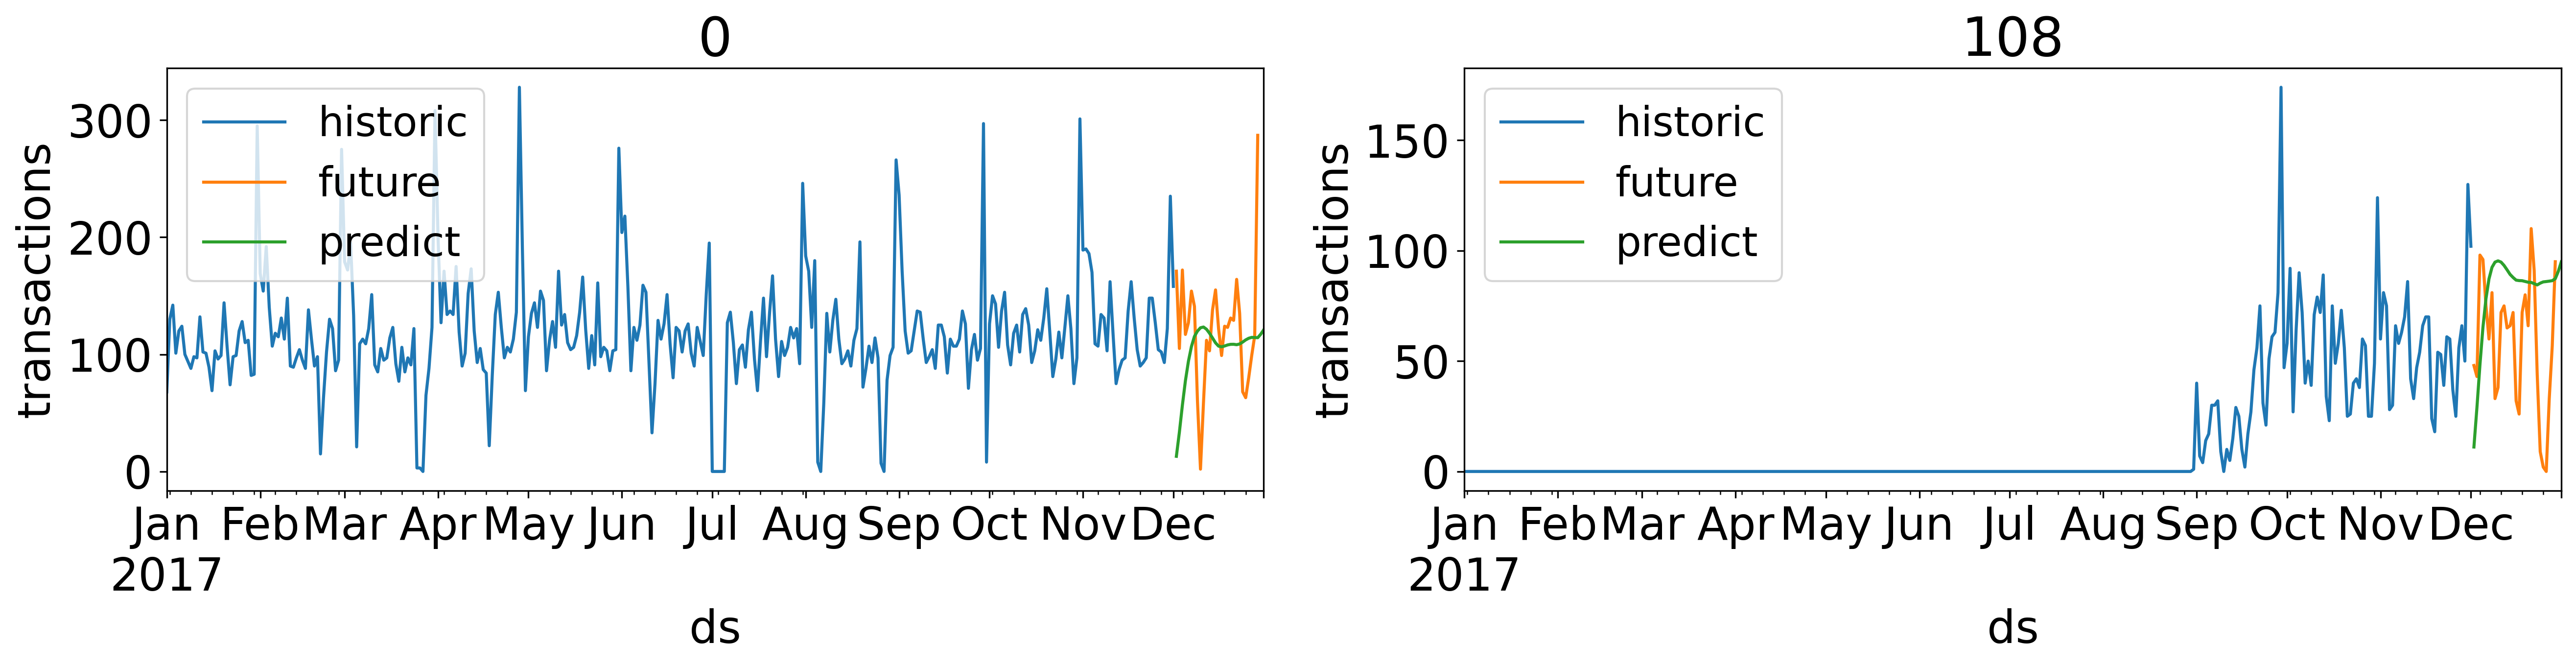

In [23]:
print(f'######## {model_name} ########')
visualize(y_pred * max_value, train_prophet, p)